<br>
<br>

# TF상위 1000단어 Uni-gram / Bi-gram 추출

In [1]:
import codecs
from nltk.util import ngrams
import re
import pandas as pd
import copy

df = pd.read_excel('뉴스데이터.xlsx')  # 1997.10.21 ~ 2020.06.15 한국경제 뉴스데이터
title = df['title'].values.tolist()
docs = title

In [2]:
print(len(docs))

9369


In [3]:
# 리뷰문장 출력
import re
clean_docs = []
pattern = '[-=+,#/\?:·;^$.%@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'   # 특수문자 제거
pattern2='[]'
cnt=0
news_remov_index=[]
for i in range(len(docs)) :
    sen=docs[i]
    
    span=[]
    for p in range(len(sen)):
        if sen[p]=='[':
            span.append(p)
        elif sen[p]==']':
            span.append(p)
        else:
            continue
    if len(span)==2:
        sen=sen[0:span[0]]+sen[span[1]+1::]     # 칼럼제목([]로 둘러싸인 문자열)을 제거
    
    sen = re.sub(pattern,"",sen) # pattern에서 정의한 특수문자 정규표현식 을 제거 
    sen = re.sub('[0-9]+','',sen)
    #sen = re.sub('[一-龥]','',sen)
    #sen = re.sub('[ㄱ-ㅣ가-힣]+','',sen)
    #sen = re.sub('[a-zA-Z]','',sen)
    sen = sen.strip() # 양옆의 공백을 제거 
    
    if sen=='':
        cnt+=1
        news_remov_index.append(i)
    clean_docs.append(sen)
    
# ex) [오늘의 뉴스] 오늘의 날씨는 맑음! ---(정제)---> 오늘 의 날씨 는 맑음   

In [4]:
clean_docs

['세계무역센터 어떤 곳인가',
 '미국주요도시 동시다발 테러공격',
 '뉴욕 세계무역센터 빌딩 비행기 충돌',
 '럼즈펠드 美 국방 관료주의와의 전면전 선언',
 '짧고 쉽게 답변자신감 보여줘야  성공취업인터뷰 요령',
 '소피아 로렌과 미녀들',
 '英공교육 성공신화 호브파크 스쿨',
 '엔화 엔대로 급등엔캐리 트레이드 청산 가속',
 '예루살렘 성벽 밝힌 빛 축제',
 '동물 난자에 사람 유전자 주입英의회 교잡배아 허용',
 '뉴욕도 공교육 개혁중  누구도 뒤처지지 않게 하라',
 '관심끄는 월 워싱턴 G 금융정상회담',
 '美기업 실적쇼크 현실로최악 경기침체 우려 커져',
 'G 정상회담 내달 일 워싱턴서 열린다',
 '뉴질랜드 기준금리 P 인하',
 '美 주요은행 부분 국유화  억弗 투입',
 '거래소도 관광지',
 '조국과 경제를 위해 사인하시오美재무부 개 은행 부분 국유화 회의 막전막후',
 '오바마 경제카드로 표심 흔들까',
 '각국 정상들 발에서 땀날라',
 '이번엔 중국산 농약 콩 파문 日주부 구토호흡곤란 호소',
 '美부실자산 관리 뉴욕멜론銀 에',
 '아시아서도 예금  보장 확산',
 '캐나다 하퍼 총리 재집권',
 '현 금융위기 년전 예측한 루비니 뉴욕대 교수',
 '폴슨 재무 바통은 누가',
 '벌크선 운임 급락세',
 '트럼프 비필수적 이동 美캐나다 국경 폐쇄',
 '美도 中처럼 軍 동원코로나 임시 병원 짓는다',
 '바이든 美 민주당 대선 후보 굳혀',
 '유럽 이어 美 車공장 멈춘다우버는 카풀 중단',
 '트럼프 또 중국 바이러스中 미국 기자 추방',
 '“이동 말라” 국경 막는 EU',
 '전세계 연일 돈풀기리먼 때 처방 뛰어넘었다',
 '급기야 헬리콥터 머니 뿌리는 트럼프Fed는 CP 사들여 부도 차단',
 '이탈리아 정부 벼랑끝 항공사 떠안겠다코로나에 국유화 선언',
 '코로나 확산에 은 가격도 하락',
 '中보다 악화된 유럽 코로나안이한 방역과 문화가 화 불러',
 '英 억파운드스페인 억유로유로존 兆유로 실탄 장전',
 '

In [5]:
docs = clean_docs

# 바이그램 추출

Mecab을 적용해 형태소로 나누고, 바이그램생성

In [6]:
from konlpy.tag import Okt
from tqdm import tqdm
from konlpy.tag import Mecab
tagger=Mecab('C:/mecab/mecab-ko-dic')

#tagger = Okt()
sentence_bigram = []

# http://kkma.snu.ac.kr/documents/?doc=postag 참고
josa=['JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC']                    # 조사
jeop_misa_and_doosa=['XSN','XSV','XSA','XPN']                                 # 접미사
boosa=['MAG','MAJ']                                                           # 부사
eomaleomy=['EF','EC','ETN','ETM','EP']                                        # 어말어미   (EP는 선어말어미)

for doc in tqdm(docs):
    p = tagger.pos(doc)
    tokens=[]
    
    for j in p:
        i=j[1]
        if (i in josa) | (i in jeop_misa_and_doosa) | (i in boosa) | (i in eomaleomy):
            continue
        tokens.append(j[0])
        
    bigram = ngrams(tokens, 2, pad_left=False, pad_right=False)
                    #left_pad_symbol="SS", right_pad_symbol="SE")
    
#     for t in bigram:
#         if t[0] in trans_cntry
    sentence_bigram += [t for t in bigram]

100%|███████████████████████████████████████████████████████████████████████████| 9369/9369 [00:00<00:00, 19018.78it/s]


In [7]:
# 예시 1)
tagger.pos('대한종금 인가 취소키로 .. 금융감독위원회')

[('대한', 'VV+ETM'),
 ('종금', 'NNG'),
 ('인가', 'VCP+EC'),
 ('취소', 'NNG'),
 ('키로', 'XSV+ETN+JKB'),
 ('.', 'SF'),
 ('.', 'SY'),
 ('금융', 'NNG'),
 ('감독', 'NNG'),
 ('위원회', 'NNG')]

In [8]:
sentence_bigram

[('세계무역센터', '어떤'),
 ('어떤', '곳'),
 ('곳', '인가'),
 ('미국', '주요'),
 ('주요', '도시'),
 ('도시', '동시'),
 ('동시', '다발'),
 ('다발', '테러'),
 ('테러', '공격'),
 ('뉴욕', '세계무역센터'),
 ('세계무역센터', '빌딩'),
 ('빌딩', '비행기'),
 ('비행기', '충돌'),
 ('럼즈펠드', '美'),
 ('美', '국방'),
 ('국방', '관료주의'),
 ('관료주의', '전면전'),
 ('전면전', '선언'),
 ('짧', '쉽'),
 ('쉽', '답변자'),
 ('답변자', '신감'),
 ('신감', '보여'),
 ('보여', '줘야'),
 ('줘야', '성공'),
 ('성공', '취업'),
 ('취업', '인터뷰'),
 ('인터뷰', '요령'),
 ('소피아', '로렌'),
 ('로렌', '미녀'),
 ('英', '공교육'),
 ('공교육', '성공'),
 ('성공', '신화'),
 ('신화', '호브'),
 ('호브', '파크'),
 ('파크', '스쿨'),
 ('엔', '엔'),
 ('엔', '급등'),
 ('급등', '엔'),
 ('엔', '캐리'),
 ('캐리', '트레이드'),
 ('트레이드', '청산'),
 ('청산', '가속'),
 ('예루살렘', '성벽'),
 ('성벽', '밝힌'),
 ('밝힌', '빛'),
 ('빛', '축제'),
 ('동물', '난자'),
 ('난자', '사람'),
 ('사람', '유전자'),
 ('유전자', '주입'),
 ('주입', '英'),
 ('英', '의회'),
 ('의회', '교잡'),
 ('교잡', '배아'),
 ('배아', '허용'),
 ('뉴욕', '공교육'),
 ('공교육', '개혁'),
 ('개혁', '중'),
 ('중', '누구'),
 ('누구', '뒤처지'),
 ('뒤처지', '않'),
 ('않', '하'),
 ('관심', '끄'),
 ('끄', '월'),
 ('월', '워싱턴'),
 ('워싱턴', 

In [9]:
# 바이그램에서 나라한자들을 한글로 Replace
trans_cntry={'美':'미국','佛':'프랑스','日':'일본','中': '중국','露': '러시아','獨':'독일','北':'북한','英':'영국','弗':'달러' }

sentence_bigram2=[]
for i in sentence_bigram:
    i=list(i)
    sentence_bigram2.append(i)
   
for i in range(len(sentence_bigram2)):
    for k in range(len(sentence_bigram2[i])):
        if sentence_bigram2[i][k] in trans_cntry.keys():
            sentence_bigram2[i][k]=trans_cntry[sentence_bigram2[i][k]]
            
sentence_bigram=copy.deepcopy(sentence_bigram2)
sentence_bigram

[['세계무역센터', '어떤'],
 ['어떤', '곳'],
 ['곳', '인가'],
 ['미국', '주요'],
 ['주요', '도시'],
 ['도시', '동시'],
 ['동시', '다발'],
 ['다발', '테러'],
 ['테러', '공격'],
 ['뉴욕', '세계무역센터'],
 ['세계무역센터', '빌딩'],
 ['빌딩', '비행기'],
 ['비행기', '충돌'],
 ['럼즈펠드', '미국'],
 ['미국', '국방'],
 ['국방', '관료주의'],
 ['관료주의', '전면전'],
 ['전면전', '선언'],
 ['짧', '쉽'],
 ['쉽', '답변자'],
 ['답변자', '신감'],
 ['신감', '보여'],
 ['보여', '줘야'],
 ['줘야', '성공'],
 ['성공', '취업'],
 ['취업', '인터뷰'],
 ['인터뷰', '요령'],
 ['소피아', '로렌'],
 ['로렌', '미녀'],
 ['영국', '공교육'],
 ['공교육', '성공'],
 ['성공', '신화'],
 ['신화', '호브'],
 ['호브', '파크'],
 ['파크', '스쿨'],
 ['엔', '엔'],
 ['엔', '급등'],
 ['급등', '엔'],
 ['엔', '캐리'],
 ['캐리', '트레이드'],
 ['트레이드', '청산'],
 ['청산', '가속'],
 ['예루살렘', '성벽'],
 ['성벽', '밝힌'],
 ['밝힌', '빛'],
 ['빛', '축제'],
 ['동물', '난자'],
 ['난자', '사람'],
 ['사람', '유전자'],
 ['유전자', '주입'],
 ['주입', '영국'],
 ['영국', '의회'],
 ['의회', '교잡'],
 ['교잡', '배아'],
 ['배아', '허용'],
 ['뉴욕', '공교육'],
 ['공교육', '개혁'],
 ['개혁', '중'],
 ['중', '누구'],
 ['누구', '뒤처지'],
 ['뒤처지', '않'],
 ['않', '하'],
 ['관심', '끄'],
 ['끄', '월'],
 ['월', '워싱턴'],
 ['워

In [10]:
# 바이그램 출력
len(sentence_bigram)

58035

In [11]:
# 뉴스데이터의 Uni-gram 만드는 과정 -> sentence_unigram
sentence_unigram=[]
for doc in tqdm(docs):
    p=tagger.pos(doc)
    tokens=[]
    
    for j in p:
        i=j[1]
        if (i in josa) | (i in jeop_misa_and_doosa) | (i in boosa) | (i in eomaleomy):
            continue
        tokens.append(j[0])
    
    for t in tokens:
        sentence_unigram.append(t)

100%|███████████████████████████████████████████████████████████████████████████| 9369/9369 [00:00<00:00, 14913.07it/s]


In [12]:
print(len(sentence_unigram))
sentence_unigram  

67402


['세계무역센터',
 '어떤',
 '곳',
 '인가',
 '미국',
 '주요',
 '도시',
 '동시',
 '다발',
 '테러',
 '공격',
 '뉴욕',
 '세계무역센터',
 '빌딩',
 '비행기',
 '충돌',
 '럼즈펠드',
 '美',
 '국방',
 '관료주의',
 '전면전',
 '선언',
 '짧',
 '쉽',
 '답변자',
 '신감',
 '보여',
 '줘야',
 '성공',
 '취업',
 '인터뷰',
 '요령',
 '소피아',
 '로렌',
 '미녀',
 '英',
 '공교육',
 '성공',
 '신화',
 '호브',
 '파크',
 '스쿨',
 '엔',
 '엔',
 '급등',
 '엔',
 '캐리',
 '트레이드',
 '청산',
 '가속',
 '예루살렘',
 '성벽',
 '밝힌',
 '빛',
 '축제',
 '동물',
 '난자',
 '사람',
 '유전자',
 '주입',
 '英',
 '의회',
 '교잡',
 '배아',
 '허용',
 '뉴욕',
 '공교육',
 '개혁',
 '중',
 '누구',
 '뒤처지',
 '않',
 '하',
 '관심',
 '끄',
 '월',
 '워싱턴',
 'G',
 '금융',
 '정상',
 '회담',
 '美',
 '기업',
 '실적',
 '쇼크',
 '현실',
 '최악',
 '경기',
 '침체',
 '우려',
 '커져',
 'G',
 '정상',
 '회담',
 '내달 일',
 '워싱턴',
 '열린다',
 '뉴질랜드',
 '기준',
 '금리',
 'P',
 '인하',
 '美',
 '주요',
 '은행',
 '부분',
 '국유',
 '억',
 '弗',
 '투입',
 '거래소',
 '관광지',
 '조국',
 '경제',
 '위해',
 '사인',
 '美',
 '재무부',
 '개 은행',
 '부분',
 '국유',
 '회의',
 '막전',
 '막후',
 '오바마',
 '경제',
 '카드',
 '표',
 '흔들',
 '각국',
 '정상',
 '발',
 '땀',
 '날라',
 '이번',
 '엔',
 '중국',
 '농약',
 '콩',
 '파문',
 '日',
 '주부

In [13]:
# sentence_unigram에 있는 한자로된 나라이름을 한글로 바꿔주는 과정
trans_cntry={'美':'미국','佛':'프랑스','日':'일본','中': '중국','露': '러시아','獨':'독일','北':'북한','英':'영국','弗':'달러' }

for i in range(len(sentence_unigram)):
    if sentence_unigram[i] in trans_cntry.keys():
        sentence_unigram[i]=trans_cntry[sentence_unigram[i]]
            
sentence_unigram

['세계무역센터',
 '어떤',
 '곳',
 '인가',
 '미국',
 '주요',
 '도시',
 '동시',
 '다발',
 '테러',
 '공격',
 '뉴욕',
 '세계무역센터',
 '빌딩',
 '비행기',
 '충돌',
 '럼즈펠드',
 '미국',
 '국방',
 '관료주의',
 '전면전',
 '선언',
 '짧',
 '쉽',
 '답변자',
 '신감',
 '보여',
 '줘야',
 '성공',
 '취업',
 '인터뷰',
 '요령',
 '소피아',
 '로렌',
 '미녀',
 '영국',
 '공교육',
 '성공',
 '신화',
 '호브',
 '파크',
 '스쿨',
 '엔',
 '엔',
 '급등',
 '엔',
 '캐리',
 '트레이드',
 '청산',
 '가속',
 '예루살렘',
 '성벽',
 '밝힌',
 '빛',
 '축제',
 '동물',
 '난자',
 '사람',
 '유전자',
 '주입',
 '영국',
 '의회',
 '교잡',
 '배아',
 '허용',
 '뉴욕',
 '공교육',
 '개혁',
 '중',
 '누구',
 '뒤처지',
 '않',
 '하',
 '관심',
 '끄',
 '월',
 '워싱턴',
 'G',
 '금융',
 '정상',
 '회담',
 '미국',
 '기업',
 '실적',
 '쇼크',
 '현실',
 '최악',
 '경기',
 '침체',
 '우려',
 '커져',
 'G',
 '정상',
 '회담',
 '내달 일',
 '워싱턴',
 '열린다',
 '뉴질랜드',
 '기준',
 '금리',
 'P',
 '인하',
 '미국',
 '주요',
 '은행',
 '부분',
 '국유',
 '억',
 '달러',
 '투입',
 '거래소',
 '관광지',
 '조국',
 '경제',
 '위해',
 '사인',
 '미국',
 '재무부',
 '개 은행',
 '부분',
 '국유',
 '회의',
 '막전',
 '막후',
 '오바마',
 '경제',
 '카드',
 '표',
 '흔들',
 '각국',
 '정상',
 '발',
 '땀',
 '날라',
 '이번',
 '엔',
 '중국',
 '농약',
 '콩',
 '파문',
 '일

In [14]:
from nltk import ConditionalFreqDist

# 조건 빈도수 구함
cfd = ConditionalFreqDist(sentence_bigram)

# 특정 단어 다음에 가장 자주 나오는 단어 (조건부 빈도수) - 예시
print('SK ->', cfd["SK"].most_common(5))  # 'SK 에너지'의 등장 빈도수가 4, 'SK 텔'의 등장빈도수가 3이라는 뜻
print('나 ->', cfd["나"].most_common(20))
print('의 ->', cfd["의"].most_common(5))
print('삼성 ->', cfd["삼성"].most_common(5))
print('감사>', cfd["감사"].most_common(20))

SK -> [('에너지', 4), ('텔', 3), ('상사', 3), ('CC', 3), ('생명', 3)]
나 -> [('대통령', 1), ('노동', 1), ('IMF', 1), ('하', 1), ('증가', 1), ('히트상품', 1), ('엔', 1), ('년간', 1), ('예', 1), ('공동운항', 1), ('숙녀', 1), ('르', 1), ('결국', 1), ('하나', 1), ('년', 1), ('포스', 1), ('상상', 1), ('채권', 1), ('환율', 1), ('상승', 1)]
의 -> []
삼성 -> [('SDS', 10), ('경제', 9), ('항공', 7), ('중공업', 7), ('자동차', 6)]
감사> [('마음', 2), ('등', 2), ('인', 2), ('의견', 2), ('황용하', 1), ('감사원', 1), ('반', 1), ('선임', 1), ('이왕종', 1), ('주', 1), ('솜방망이', 1), ('보고서', 1)]


In [37]:
# 한글자 빼기
sen=[]
for i in sentence_unigram:
    if len(i)>1:
        sen.append(i)
sentence_unigram=copy.deepcopy(sen)

In [38]:
# Uni-gram의 단어와 단어별 빈도수를 데이터프레임으로 만듦 -> df
freq=[]
sentence_unigram=set(sentence_unigram)
for i in sentence_unigram:
    freq.append(sum(cfd[i].values()))

In [39]:
print(len(sentence_unigram))
print(len(freq))

12238
12238


In [41]:
sentence_unigram=list(sentence_unigram)

In [42]:
sentence_unigram

['동량',
 '산뜻',
 '삼우',
 '임대인',
 '와이어트',
 '공장입지',
 '스파크',
 'CA',
 '의회',
 '무전기',
 '정우성',
 '스키장',
 '마이크론',
 '조리',
 '병무청',
 '기어',
 '무제한',
 '다채',
 '프레임',
 '좌담',
 '조직개편',
 '조기',
 '마고',
 '아프간',
 '월트디즈니',
 '연형',
 '절반',
 '덕인',
 '만나',
 '목마른',
 '역관',
 'LG칼',
 '김종화',
 '즐거움',
 '만족',
 '출마',
 '문단',
 '靑靑',
 '스포츠',
 '포항',
 '헬스',
 '급전',
 '추방',
 '다가서',
 '물결',
 '공공경제',
 '정안',
 '종잣돈',
 '노하우',
 '중개업',
 '엇갈려',
 '협조융자협약',
 '대청',
 '유보',
 '차체',
 '분업',
 '회담',
 '배워라',
 '백만',
 '국순당',
 '지리',
 '아서',
 '김원길',
 '임시',
 '모듈',
 '발표회',
 '불변',
 '세로',
 '위원회',
 '통신대',
 '나약',
 '정면',
 '전철환',
 '최종',
 '팔자',
 '부담금',
 '초음파',
 '신축',
 '금산',
 '절벽',
 '현대중공업',
 '일진',
 '구내전화',
 '다툼',
 '김홍식',
 '나토',
 '연동',
 '식성',
 '국제회의',
 '복합',
 '환율 급등',
 '오복',
 '리갈',
 '스터디',
 '예쁜',
 '활기',
 '행단',
 '고양시',
 '투입',
 '정책공',
 'CDCMBS',
 '김동관',
 '활황',
 '빙하기',
 '프레드릭',
 '개발비',
 '분리',
 'ICT',
 '평면',
 '계열',
 '세계',
 '김근성',
 '설연휴',
 '허무',
 '몽블랑',
 '바이오',
 'KBL',
 '운수',
 '막강',
 '고구마',
 '국제종합기계',
 '쿠바',
 '콘크리트',
 '개사',
 '라이브러리',
 '방수재',
 '화근',
 '금경',
 '여야',
 '中小',
 '장려금

In [43]:
df_unigram = pd.DataFrame({'Word':sentence_unigram,'Frequency':freq})
df_unigram = df_unigram.sort_values(by='Frequency', ascending=False)
df_unigram.index=df_unigram['Word']
df_unigram

,Word,Frequency
Word,,
미국,미국,455
기업,기업,388
한국,한국,355
금융,금융,318
일본,일본,300
...,...,...
이홍선,이홍선,0
길라잡이,길라잡이,0
재조명,재조명,0


In [61]:
Frequency_df_unigram=df_unigram.head(1000)    # Uni-gram의 TF top1000이 들어간 데이터프레임 -> 저장할 데이터프레임
df_unigram.head(30)

,Word,Frequency
Word,,
미국,미국,455
기업,기업,388
한국,한국,355
금융,금융,318
일본,일본,300
경제,경제,274
달러,달러,256
은행,은행,238
중국,중국,237


In [62]:
# 예시)
print(df_unigram[df_unigram['Word']=='LG'].Frequency)  # LG라는 단어의 총 등장 횟수 : 194회

# 예시)
print(cfd['사람'].most_common()[0])    # '사람'이라는 단어 다음에 가장 많이 나오는 단어는 '정보' 이며 그 횟수는 2회

Word
LG    194
Name: Frequency, dtype: int64
('정보', 2)


(array([200.,  11.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <a list of 10 Patch objects>)

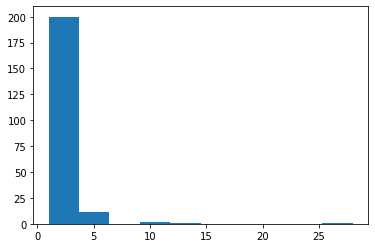

In [63]:
import numpy as np
from matplotlib import pyplot as plt

t=cfd['한국'].values()   # 한국다음에 나오는 단어들의 등장횟수들을 그래프로 나타냄
plt.hist(t)              # 한국 다음에 나오는 단어들의 등장횟수중 1번이 제일 많음을 알 수 있다

In [64]:
# 각 단어별, 등장하는 단어들과 그 횟수들을 정리한 사전을 생성

d={}                          
for i in df_unigram.index:
    sub=[]
    d[i]=[]
    for p in cfd[i].most_common():
        if p[1]==1:
            break
        sub.append(p)
    d[i]+=sub

In [65]:
d

{'미국': [('일본', 11),
  ('유럽', 11),
  ('수출', 11),
  ('경제', 10),
  ('기업', 9),
  ('시장', 7),
  ('의회', 7),
  ('중국', 6),
  ('월', 5),
  ('금융', 5),
  ('자동차', 4),
  ('금리', 4),
  ('국채', 4),
  ('달러', 4),
  ('정부', 4),
  ('영국', 4),
  ('등', 4),
  ('최대', 4),
  ('EU', 4),
  ('한국', 4),
  ('민주당', 3),
  ('FRB', 3),
  ('증권', 3),
  ('증시', 3),
  ('방문', 3),
  ('신용', 3),
  ('상원', 3),
  ('경기', 3),
  ('회사', 3),
  ('하원', 3),
  ('IMF', 3),
  ('연방', 3),
  ('반도체', 3),
  ('빅', 3),
  ('주요', 2),
  ('재무부', 2),
  ('캐나다', 2),
  ('기자', 2),
  ('대통령', 2),
  ('개', 2),
  ('내년', 2),
  ('농무부', 2),
  ('채권', 2),
  ('내', 2),
  ('대선', 2),
  ('일', 2),
  ('실업', 2),
  ('주택', 2),
  ('USA', 2),
  ('법인', 2),
  ('구제', 2),
  ('증권사', 2),
  ('PCS', 2),
  ('품질', 2),
  ('자국', 2),
  ('벤처', 2),
  ('제소', 2),
  ('ITC', 2),
  ('월마트', 2)],
 '기업': [('은행', 12),
  ('경영', 7),
  ('구조', 7),
  ('자금난', 6),
  ('선정', 5),
  ('모집', 5),
  ('지원', 4),
  ('개혁', 4),
  ('해외', 4),
  ('내년', 4),
  ('정보', 4),
  ('인', 4),
  ('간', 3),
  ('등', 3),
  ('육성', 3),
  ('정책', 3),
 

In [66]:
# 각 uni그램들의 횟수들을 이용해 bi그램을 생성
 
compound_word2 = [] 
frequency_word=[]

lst=[]

max_column_len=0
for j in range(len(df_unigram.index)):
    compound_word = [df_unigram.index[j]]
    test=[x[1] for x in d[df_unigram.index[j]]]    # 사전(d)내 키의 값들을 모두 더해서 빈도수를 만들고 그것을 frequency_word에 담음
    if sum(test)==0:
        continue
    frequency_word.append(sum(test))
    max_column_len=max(max_column_len,len(d[df_unigram.index[j]]))
    
    for i in d[df_unigram.index[j]]:
        word = i[0]
        if len(word)>1:
            compound = df_unigram.index[j] + ' ' + word +' ' +'(' + str(i[1]) +')'             
            lst.append((df_unigram.index[j]+word,i[1]))
            #compound = re.sub('[^\w\s]',"",compound) 
            #compound = re.sub('[a-zA-Z]',"",compound)
            #print(compound)
            compound_word.append(compound)
    compound_word2.append(compound_word) 

In [67]:
compound_word2

[['미국',
  '미국 일본 (11)',
  '미국 유럽 (11)',
  '미국 수출 (11)',
  '미국 경제 (10)',
  '미국 기업 (9)',
  '미국 시장 (7)',
  '미국 의회 (7)',
  '미국 중국 (6)',
  '미국 금융 (5)',
  '미국 자동차 (4)',
  '미국 금리 (4)',
  '미국 국채 (4)',
  '미국 달러 (4)',
  '미국 정부 (4)',
  '미국 영국 (4)',
  '미국 최대 (4)',
  '미국 EU (4)',
  '미국 한국 (4)',
  '미국 민주당 (3)',
  '미국 FRB (3)',
  '미국 증권 (3)',
  '미국 증시 (3)',
  '미국 방문 (3)',
  '미국 신용 (3)',
  '미국 상원 (3)',
  '미국 경기 (3)',
  '미국 회사 (3)',
  '미국 하원 (3)',
  '미국 IMF (3)',
  '미국 연방 (3)',
  '미국 반도체 (3)',
  '미국 주요 (2)',
  '미국 재무부 (2)',
  '미국 캐나다 (2)',
  '미국 기자 (2)',
  '미국 대통령 (2)',
  '미국 내년 (2)',
  '미국 농무부 (2)',
  '미국 채권 (2)',
  '미국 대선 (2)',
  '미국 실업 (2)',
  '미국 주택 (2)',
  '미국 USA (2)',
  '미국 법인 (2)',
  '미국 구제 (2)',
  '미국 증권사 (2)',
  '미국 PCS (2)',
  '미국 품질 (2)',
  '미국 자국 (2)',
  '미국 벤처 (2)',
  '미국 제소 (2)',
  '미국 ITC (2)',
  '미국 월마트 (2)'],
 ['기업',
  '기업 은행 (12)',
  '기업 경영 (7)',
  '기업 구조 (7)',
  '기업 자금난 (6)',
  '기업 선정 (5)',
  '기업 모집 (5)',
  '기업 지원 (4)',
  '기업 개혁 (4)',
  '기업 해외 (4)',
  '기업 내년 (4)',
  '기업 정보 (4)',
  '

In [68]:
df_bigram = pd.DataFrame(compound_word2)
df_bigram=df_bigram.rename(columns = {0: "Word"})     

In [69]:
df_bigram.insert(1, 'Total_Frequency', frequency_word)
print(len(frequency_word))

1687


In [70]:
df_bigram.head(10)

,Word,Total_Frequency,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
0,미국,214,미국 일본 (11),미국 유럽 (11),미국 수출 (11),미국 경제 (10),미국 기업 (9),미국 시장 (7),미국 의회 (7),미국 중국 (6),...,미국 법인 (2),미국 구제 (2),미국 증권사 (2),미국 PCS (2),미국 품질 (2),미국 자국 (2),미국 벤처 (2),미국 제소 (2),미국 ITC (2),미국 월마트 (2)
1,기업,152,기업 은행 (12),기업 경영 (7),기업 구조 (7),기업 자금난 (6),기업 선정 (5),기업 모집 (5),기업 지원 (4),기업 개혁 (4),...,None,None,None,None,None,None,None,None,None,None
2,한국,186,한국 경제 (28),한국 기업 (12),한국 투자 (11),한국 금융 (10),한국 무역 (6),한국 IBM (6),한국 신용 (6),한국 일본 (5),...,None,None,None,None,None,None,None,None,None,None
3,금융,202,금융 기관 (34),금융 위기 (26),금융 시장 (14),금융 안정 (9),금융 감독 (7),금융 산업 (6),금융 감독원 (6),금융 종합 (6),...,None,None,None,None,None,None,None,None,None,None
4,일본,123,일본 기업 (12),일본 경제 (11),일본 미국 (6),일본 은행 (6),일본 정부 (6),일본 금융 (5),일본 자동차 (4),일본 총리 (4),...,None,None,None,None,None,None,None,None,None,None
5,경제,177,경제 정책 (13),경제 위기 (12),경제 신문 (8),경제 살리 (7),경제 연구소 (7),경제 대책 (6),경제 단체장 (5),경제 신문사 (5),...,None,None,None,None,None,None,None,None,None,None
6,달러,146,달러 규모 (13),달러 투자 (10),달러 수주 (10),달러 수출 (8),달러 유치 (7),달러 지원 (5),달러 돌파 (5),달러 어치 (5),...,None,None,None,None,None,None,None,None,None,None
7,은행,76,은행 구조 (6),은행 예금 (5),은행 부실 (4),은행 외화 (4),은행 감독원 (4),은행 한국 (3),은행 경영 (3),은행 기업 (3),...,None,None,None,None,None,None,None,None,None,None
8,중국,77,중국 미국 (5),중국 정부 (5),중국 위안 (4),중국 금리 (4),중국 WTO (4),중국 수출 (4),중국 CDMA (4),중국 한국 (3),...,None,None,None,None,None,None,None,None,None,None
9,시장,101,시장 진출 (12),시장 개척 (7),시장 안정 (7),시장 점유 (6),시장 개방 (5),시장 본격 공략 (5),시장 안정책 (4),시장 적극 (4),...,None,None,None,None,None,None,None,None,None,None


In [71]:
# Top 1000까지의 bigram단어들을 추출

lst=sorted(lst,key=lambda x : x[1],reverse=True)
top_1000=lst[:1000]
top_1000

Frequency_df=pd.DataFrame()
compound_word=[]
freqs=[]
for i in top_1000:
    compound_word.append(i[0])
    freqs.append(i[1])
Frequency_df_bigram=pd.DataFrame({'Word':compound_word,'Frequency':freqs})
Frequency_df_bigram

,Word,Frequency
0,구조조정,95
1,정보통신,51
2,LG전자,38
3,시스템개발,36
4,금융기관,34
...,...,...
995,피부보호,3
996,올림픽연기,3
997,맞춤서비스,3
998,향후진로,3


In [76]:
# Frequency_df_bigram : BI-gram TF Top1000 단어 (처음 한번만 해주기)
# Frequency_df_unigram : Uni-gram TF Top1000 단어 (처음 한번만 해주기)
Frequency_df_bigram.to_excel('./Bi_Gram_By_Mecab_Top1000.xlsx',encoding='utf-8-sig',index=False) 
Frequency_df_unigram.to_excel('./Uni_Gram_By_Mecab_Top1000.xlsx',encoding='utf-8-sig',index=False)

In [73]:
df_bigram = df_bigram.sort_values(by='Total_Frequency', ascending=False)
df_bigram

,Word,Total_Frequency,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
0,미국,214,미국 일본 (11),미국 유럽 (11),미국 수출 (11),미국 경제 (10),미국 기업 (9),미국 시장 (7),미국 의회 (7),미국 중국 (6),...,미국 법인 (2),미국 구제 (2),미국 증권사 (2),미국 PCS (2),미국 품질 (2),미국 자국 (2),미국 벤처 (2),미국 제소 (2),미국 ITC (2),미국 월마트 (2)
3,금융,202,금융 기관 (34),금융 위기 (26),금융 시장 (14),금융 안정 (9),금융 감독 (7),금융 산업 (6),금융 감독원 (6),금융 종합 (6),...,None,None,None,None,None,None,None,None,None,None
2,한국,186,한국 경제 (28),한국 기업 (12),한국 투자 (11),한국 금융 (10),한국 무역 (6),한국 IBM (6),한국 신용 (6),한국 일본 (5),...,None,None,None,None,None,None,None,None,None,None
5,경제,177,경제 정책 (13),경제 위기 (12),경제 신문 (8),경제 살리 (7),경제 연구소 (7),경제 대책 (6),경제 단체장 (5),경제 신문사 (5),...,None,None,None,None,None,None,None,None,None,None
1,기업,152,기업 은행 (12),기업 경영 (7),기업 구조 (7),기업 자금난 (6),기업 선정 (5),기업 모집 (5),기업 지원 (4),기업 개혁 (4),...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,타임,2,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1002,ABS,2,ABS 실무 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1003,GDP,2,GDP 증가 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1004,일반,2,일반 직원 (2),None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [74]:
df_bigram.to_excel('./Bigram_Words.xlsx',encoding='utf-8-sig',index=False)